<a href="https://colab.research.google.com/github/gitguy007/2026-ColabWorks/blob/main/MLSeries_AirBnB_Booking_Analysis_using_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
URL : https://www.geeksforgeeks.org/machine-learning/airbnb-booking-analysis-using-eda/

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "sample_data/Airbnb_Open_Data.csv"
df = pd.read_csv(file_path)
print(df.head())

        id                                              NAME       host id  \
0  1001254                Clean & quiet apt home by the park  8.001449e+10   
1  1002102                             Skylit Midtown Castle  5.233517e+10   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  7.882924e+10   
3  1002755                                               NaN  8.509833e+10   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  9.203760e+10   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  Uni

In [4]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [5]:
print(df.isnull().sum())

id                                    0
NAME                                114
host id                               1
host_identity_verified              159
host name                           225
neighbourhood group                  28
neighbourhood                        17
lat                                   9
long                                  9
country                              88
country code                         80
instant_bookable                     80
cancellation_policy                  51
room type                             1
Construction year                   147
price                                99
service fee                          87
minimum nights                      179
number of reviews                    35
last review                        5239
reviews per month                  5225
review rate number                  114
calculated host listings count       84
availability 365                    179
house_rules                       10496


In [6]:
# Convert 'last review' to datetime and handle errors
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

# Fill missing values
df.fillna({'reviews per month': 0, 'last review': df['last review'].min()}, inplace=True)

# Drop records with missing 'name' or 'host name'
df.dropna(subset=['NAME', 'host name'], inplace=True)

In [7]:
# Remove dollar signs and convert to float
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['service fee'] = df['service fee'].replace('[\$,]', '', regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-138066982.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
/tmp/ipython-input-138066982.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['service fee'] = df['service fee'].replace('[\$,]', '', regex=True).astype(float)


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 31278 entries, 0 to 31609
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              31278 non-null  int64         
 1   NAME                            31278 non-null  object        
 2   host id                         31278 non-null  float64       
 3   host_identity_verified          31132 non-null  object        
 4   host name                       31278 non-null  object        
 5   neighbourhood group             31254 non-null  object        
 6   neighbourhood                   31262 non-null  object        
 7   lat                             31270 non-null  float64       
 8   long                            31270 non-null  float64       
 9   country                         31197 non-null  object        
 10  country code                    31208 non-null  object        
 11  instant

In [10]:
print(df.describe())

                 id       host id           lat          long  \
count  3.127800e+04  3.127800e+04  31270.000000  31270.000000   
mean   9.707788e+06  4.932655e+10     40.729042    -73.954279   
min    1.001254e+06  1.303496e+08     40.499790    -74.242850   
25%    5.364092e+06  2.469690e+10     40.689260    -73.982450   
50%    9.695366e+06  4.915948e+10     40.722510    -73.956480   
75%    1.401780e+07  7.405914e+10     40.763800    -73.939440   
max    1.845899e+07  9.876097e+10     40.911690    -73.712990   
std    5.020651e+06  2.851336e+10      0.053981      0.042237   

       Construction year         price   service fee  minimum nights  \
count       31145.000000  31183.000000  31192.000000    31106.000000   
mean         2012.479050    622.758875    124.487304        7.268148   
min          2003.000000     50.000000     10.000000      -12.000000   
25%          2007.000000    335.000000     67.000000        2.000000   
50%          2012.000000    620.000000    124.000000  

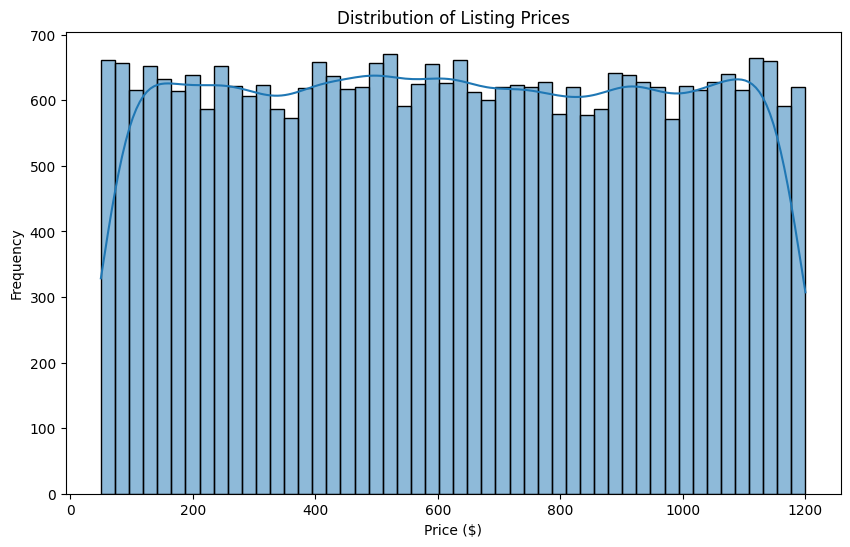

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Listing Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

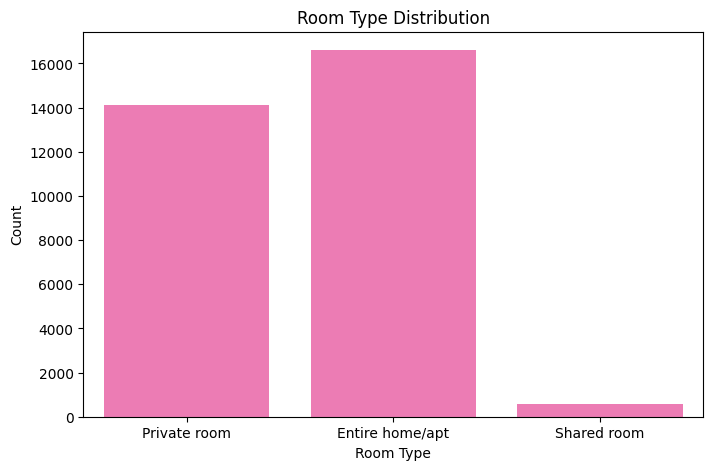

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x='room type', data=df , color='hotpink')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

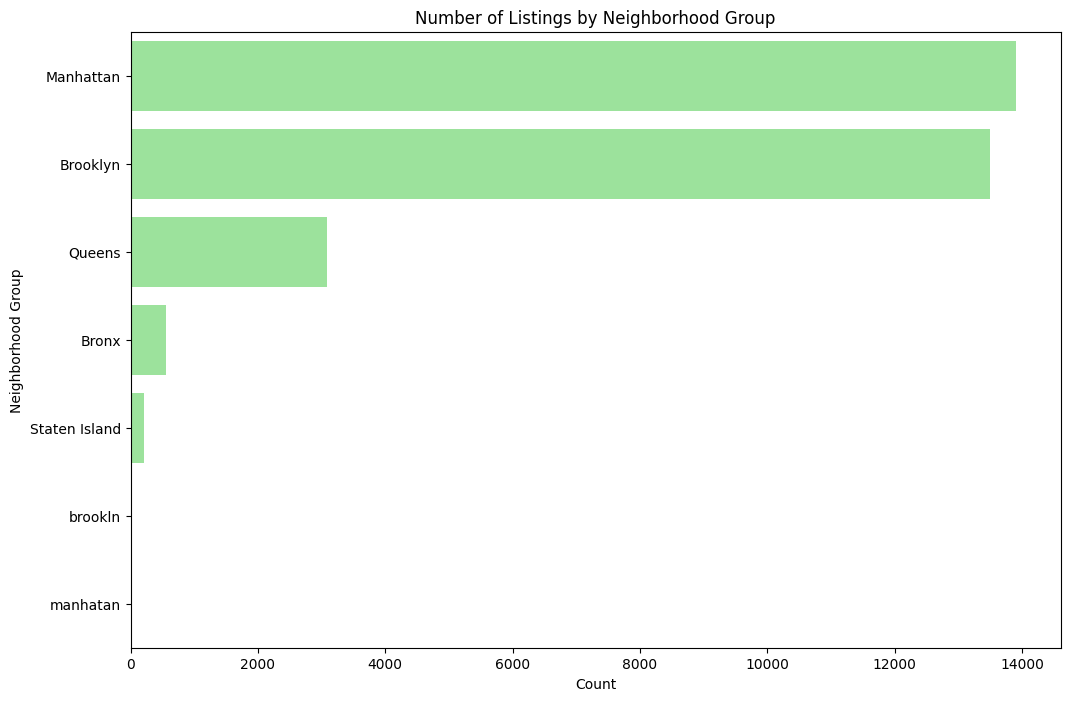

In [13]:
plt.figure(figsize=(12, 8))
sns.countplot(y='neighbourhood group', data=df,color="lightgreen" , order=df['neighbourhood group'].value_counts().index)
plt.title('Number of Listings by Neighborhood Group')
plt.xlabel('Count')
plt.ylabel('Neighborhood Group')
plt.show()

/tmp/ipython-input-3352285238.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Room Type')


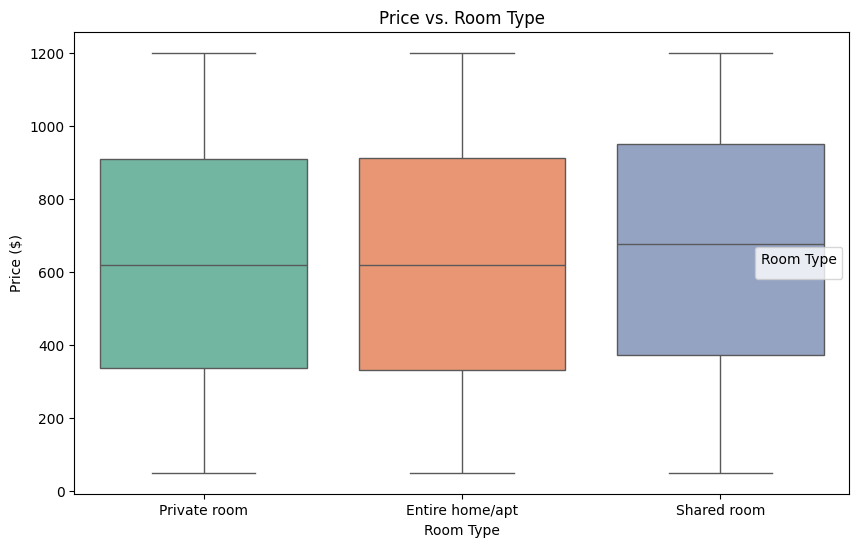

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room type', y='price', hue='room type', data=df, palette='Set2')
plt.title('Price vs. Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.legend(title='Room Type')
plt.show()

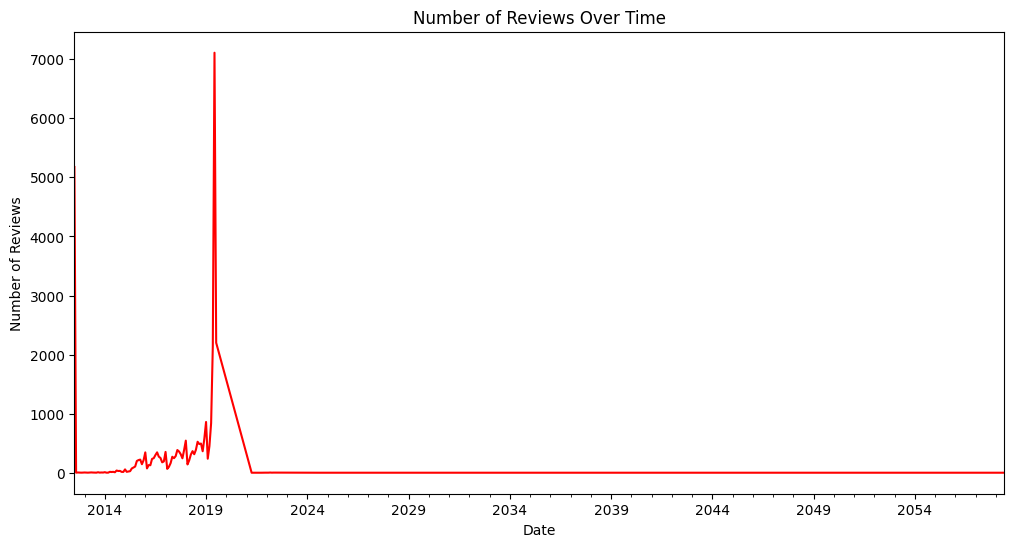

In [15]:
df['last review'] = pd.to_datetime(df['last review'])
reviews_over_time = df.groupby(df['last review'].dt.to_period('M')).size()

plt.figure(figsize=(12, 6))
reviews_over_time.plot(kind='line',color='red')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()